## Assignment 3 - Deadline: Oct 16, 2024, Wed 11pm

#### DSAI 510 Fall 2024

Complete the assignment below and upload <span style="color:red">both the .ipynb file and its pdf</span> to https://moodle.bogazici.edu.tr by the deadline given above. The submission page on Moodle will close automatically after this date and time.


To make a pdf, this may work: Hit CMD+P or CTRL+P, and save it as PDF. You may also use other options from the File menu.

In [1]:
# Run this cell first

import pandas as pd
import numpy as np

# Set the display option to show all rows scrolling with a slider
pd.set_option('display.max_rows', None)
# To disable this, run the line below:
# pd.reset_option('display.max_rows')

## Note: 
In the problems below, if they ask "show the number of records that are nonzero", 
the answer is a number; so you don't need to show the records themselves.
But if it asks, "show the records with NaN", it wants you to print those records (rows)
containing NAN and other entries, not asking how many such records there are. So be careful about what you're asked.

## Problem 1 (10 pts)

(a) Load the Ames house dataset from the file **train.csv**.

(b) Display the records with sale price greater than 500000 USD and LotFrontage less than 150 feet. Show only these columns: **Id**, **LotFrontage** and **SalePrice**.

(c) Print the list of all possible distinct values for the column **SaleCondition** for the records where sale price is greater than 500000 USD and LotFrontage is less than 150 feet.

(d) Create an interactive scatter plot of LotFrontage versus SalePrice, displaying only the records identified in the previous step. When hovering over the dots, the plot should display the **SaleCondition** in addition to **LotFrontage** and **SalePrice** information.



In [3]:
# Load the house dataset into dataframes
df = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\train.csv")

# Display records with specific conditions
filtered_df = df[(df['SalePrice'] > 500000) & (df['LotFrontage'] < 150)]
print(filtered_df[['Id', 'LotFrontage', 'SalePrice']])

        Id  LotFrontage  SalePrice
178    179         63.0     501837
440    441        105.0     555000
691    692        104.0     755000
769    770         47.0     538000
803    804        107.0     582933
898    899        100.0     611657
1046  1047         85.0     556581
1169  1170        118.0     625000


In [4]:
# Print distinct SaleCondition values for filtered records
distinct_sale_conditions = filtered_df['SaleCondition'].unique()
print("\nDistinct SaleCondition values:")
print(distinct_sale_conditions)


Distinct SaleCondition values:
['Partial' 'Normal']


In [5]:
pip install pandas plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import plotly.express as px

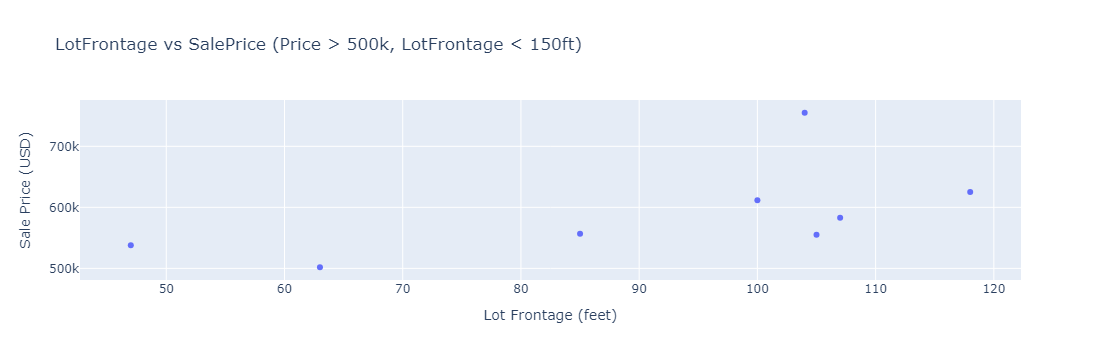

In [7]:
# Create an interactive scatter plot
fig = px.scatter(filtered_df, x='LotFrontage',y='SalePrice',hover_data=['SaleCondition'],title='LotFrontage vs SalePrice (Price > 500k, LotFrontage < 150ft)')

fig.update_layout(
    xaxis_title='Lot Frontage (feet)',
    yaxis_title='Sale Price (USD)'
)

fig.show()

## Problem 2 (10 pts)

(a) Display the list of neighborhood names and 'mean sale price' for those neighborhoods for the records whose SaleCondition is 'Normal'.

(b) Display the list of neighborhood names and the difference "max sale price - mean sale price" for each neighborhood. (Here "-" is for subtraction.)

(c) Recreate the boxplot comparing Neighborhood to SalePrice that we made in class. This time, order the neighborhoods based on their medians in ascending order, from left to right. In other words, the neighborhood with the lowest SalePrice median should be on the far left.

In [8]:
# Mean sale price for neighborhoods with 'Normal' SaleCondition
normal_sales = df[df['SaleCondition'] == 'Normal']
mean_prices = normal_sales.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)

print("(a) Mean sale prices for neighborhoods with 'Normal' SaleCondition:")
print(mean_prices.round(2))  # for visuality only print 2 digits after comma

(a) Mean sale prices for neighborhoods with 'Normal' SaleCondition:
Neighborhood
NoRidge    328219.14
NridgHt    285046.67
StoneBr    264870.38
Veenker    238772.73
Timber     238484.39
ClearCr    220993.00
Somerst    217760.65
Crawfor    204863.65
CollgCr    193877.22
NWAmes     193799.30
SawyerW    191505.60
Gilbert    189392.81
Blmngtn    188977.08
Mitchel    155410.71
NAmes      147533.55
NPkVill    143031.25
SWISU      139788.64
Blueste    137500.00
Sawyer     136976.61
OldTown    133173.49
Edwards    127803.05
BrkSide    125588.43
IDOTRR     108575.86
BrDale     107916.67
MeadowV     98987.50
Name: SalePrice, dtype: float64


In [9]:
# (b) Difference between max and mean sale price for each neighborhood
max_prices = df.groupby('Neighborhood')['SalePrice'].max()
mean_prices_all = df.groupby('Neighborhood')['SalePrice'].mean()
price_difference = max_prices - mean_prices_all

print("\n(b) Difference between max and mean sale price for each neighborhood:")
print(price_difference.sort_values(ascending=False).round(2)) # for visuality only print 2 digits after comma


(b) Difference between max and mean sale price for each neighborhood:
Neighborhood
NoRidge    419704.68
OldTown    346774.70
NridgHt    295386.38
StoneBr    246082.00
CollgCr    226904.23
NAmes      199152.92
Somerst    197620.16
Edwards    191780.30
Gilbert    184645.49
Crawfor    181875.27
Veenker    146227.27
Timber     136252.55
SawyerW    133444.20
ClearCr    115434.57
Mitchel    114729.88
NWAmes     110749.93
BrkSide     98665.95
Blmngtn     69690.12
IDOTRR      69376.22
SWISU       57408.64
Sawyer      53206.86
MeadowV     52823.53
BrDale      20506.25
Blueste     13500.00
NPkVill     12305.56
Name: SalePrice, dtype: float64


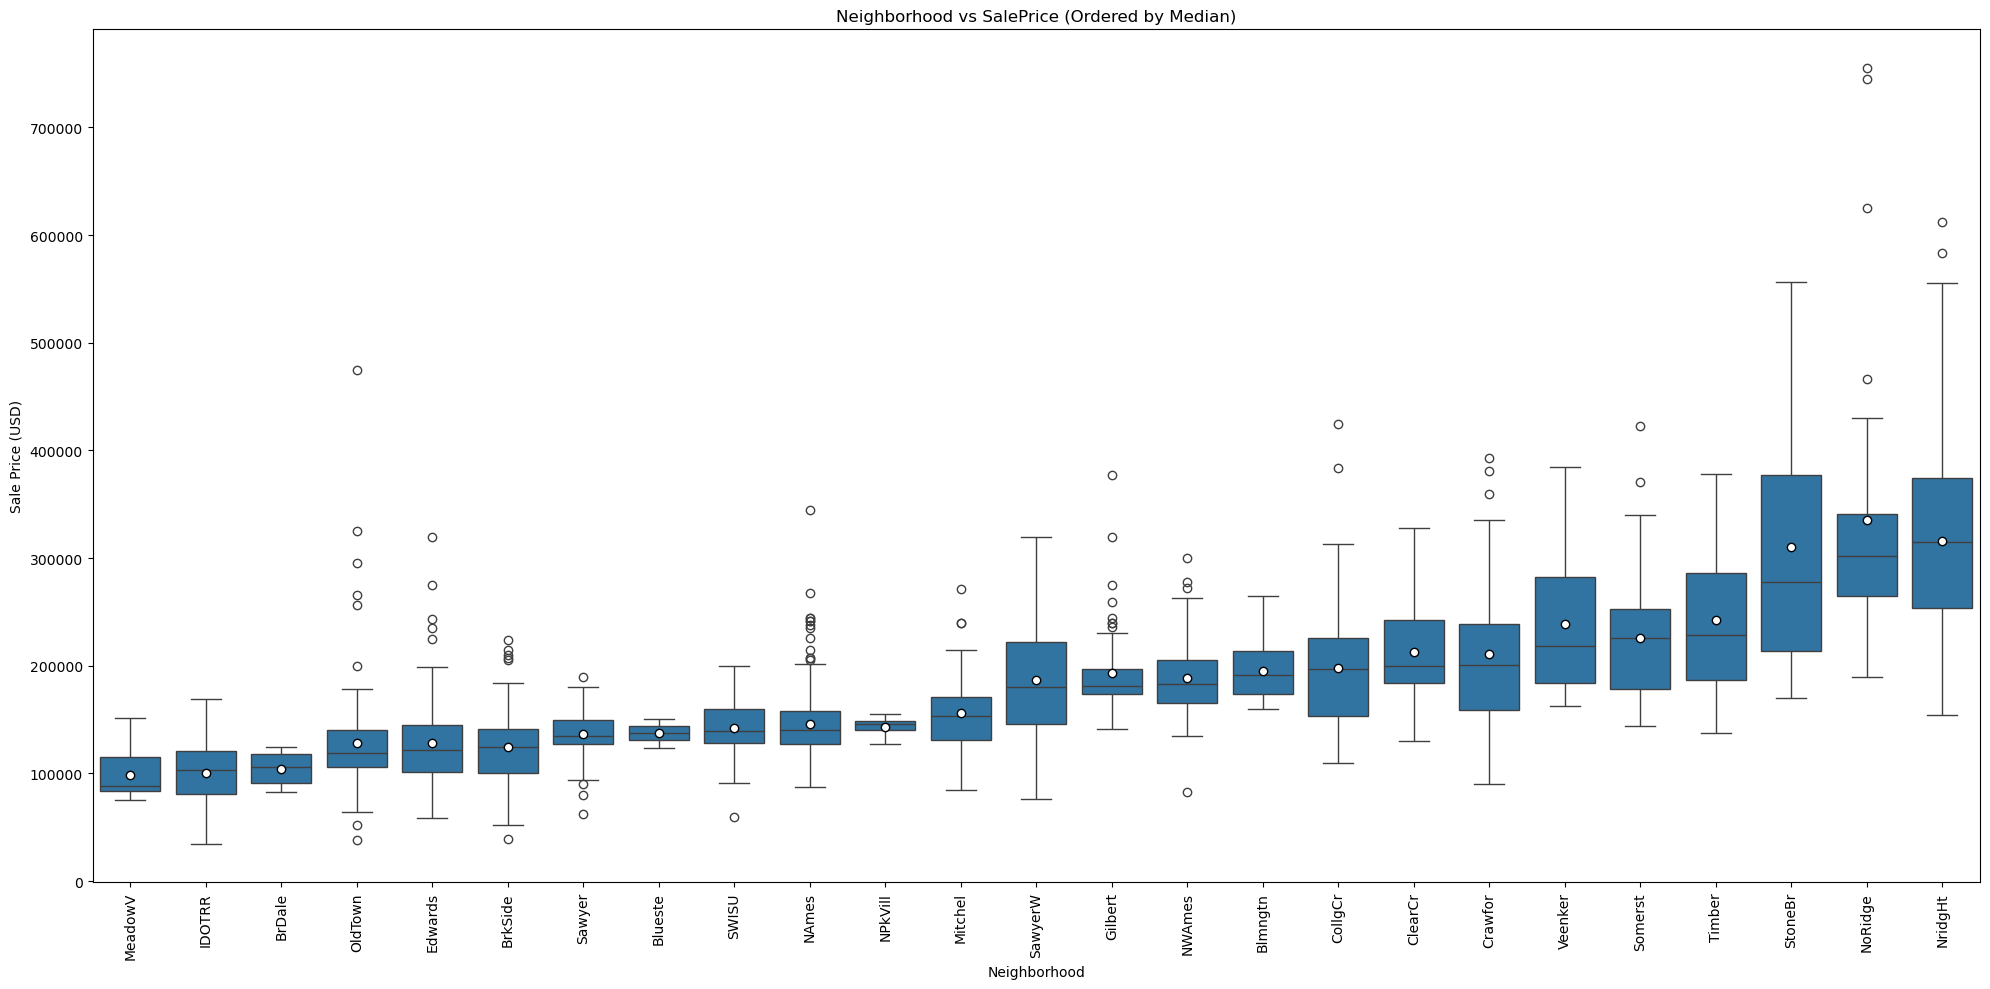

In [12]:
# Calculate median SalePrice for each neighborhood and sort
median_prices = df.groupby('Neighborhood')['SalePrice'].median().sort_values()
neighborhood_order = median_prices.index.tolist()

# Create the plot
plt.figure(figsize=(20, 10))

# Create the boxplot
sns.boxplot(x='Neighborhood', y='SalePrice', data=df, order=neighborhood_order,
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"})

plt.title('Neighborhood vs SalePrice (Ordered by Median)')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price (USD)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Problem 3 (10 pts)
Here we'll show some of the houses on the map.

(a) Install the folium package with ``!pip install folium``.

(b) Suppose your manager at the yellow website fromtheowner.com wants you to make a webpage showing houses on sale. Create the interactive map by using ``folium`` package to produce the map shown below for the 30 houses whose Id's and coordinates are given in **locations.csv**. When you click on any pin on the map, the box should show the Id and SalePrice of that house as shown in the map below. You can find the SalePrice information in **train.csv**, and it's connected to **locations.csv** by the common column **Id**. 

(Hint for folium usage: ChatGPT, Google, folium documentary...)

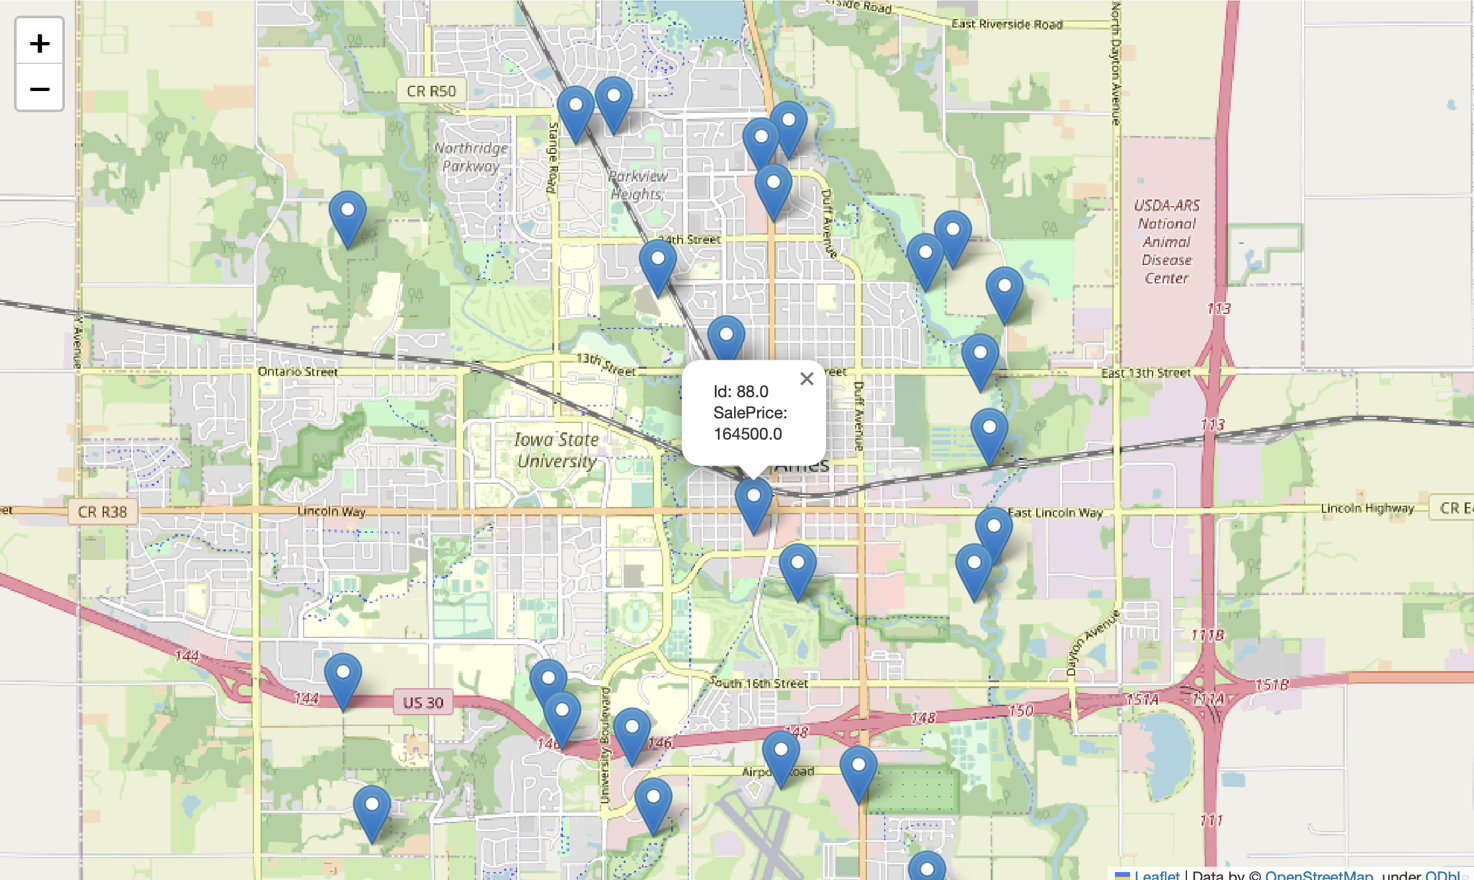




In [13]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [15]:
import folium
from IPython.display import display

# Load and read the datasets
locations_df = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\locations.csv")
train_df = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\train.csv")

# Merge the datasets on the 'Id' column
merged_df = pd.merge(locations_df, train_df[['Id', 'SalePrice']], on='Id', how='left')

# Create a map centered on the mean latitude and longitude
center_lat = merged_df['Latitude'].mean()
center_lon = merged_df['Longitude'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add markers for each house
for idx, row in merged_df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Id: {row['Id']}<br>SalePrice: ${row['SalePrice']:,.2f}",
        tooltip="Click for details"
    ).add_to(m)

# Display the map in the notebook
display(m)

# Save the map
output_file = r"C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\house_map.html"
m.save(output_file)

print(f"Map has been created and saved as '{output_file}'")

Map has been created and saved as 'C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\house_map.html'


## Problem 4 (10 pts)

(a) Load the data from **Electric_Vehicle_Population_Data.csv** into a dataframe `df`. Show the first five records (don't run `df` to show all records; jupyter notebook crashes as the data has 150482 rows).

(b) Make `df2` where it only includes the records whose **Electric Range** is 'Battery Electric Vehicle (BEV)' and **Electric Range** is greater than zero. (There should be ~47000 records satisfying these conditions; check the length of your final dataframe before proceeding!).

(c) Use `df2`to plot the histrogram of the column **Electric Range**

(d) Use `df2`to create three boxplots as we did in the class for Electric Range in the y-axis and 'Model Year', 'Make' and 'Model' categories in the x-axis. Use sns library and set ``col_wrap=1, sharex=False, sharey=False, height=10`` so that we don't get two or more boxplots side by side. Your plots should look like this (I put them side by side to save space here; yours will be stacked vertically in the Jupyter notebook):

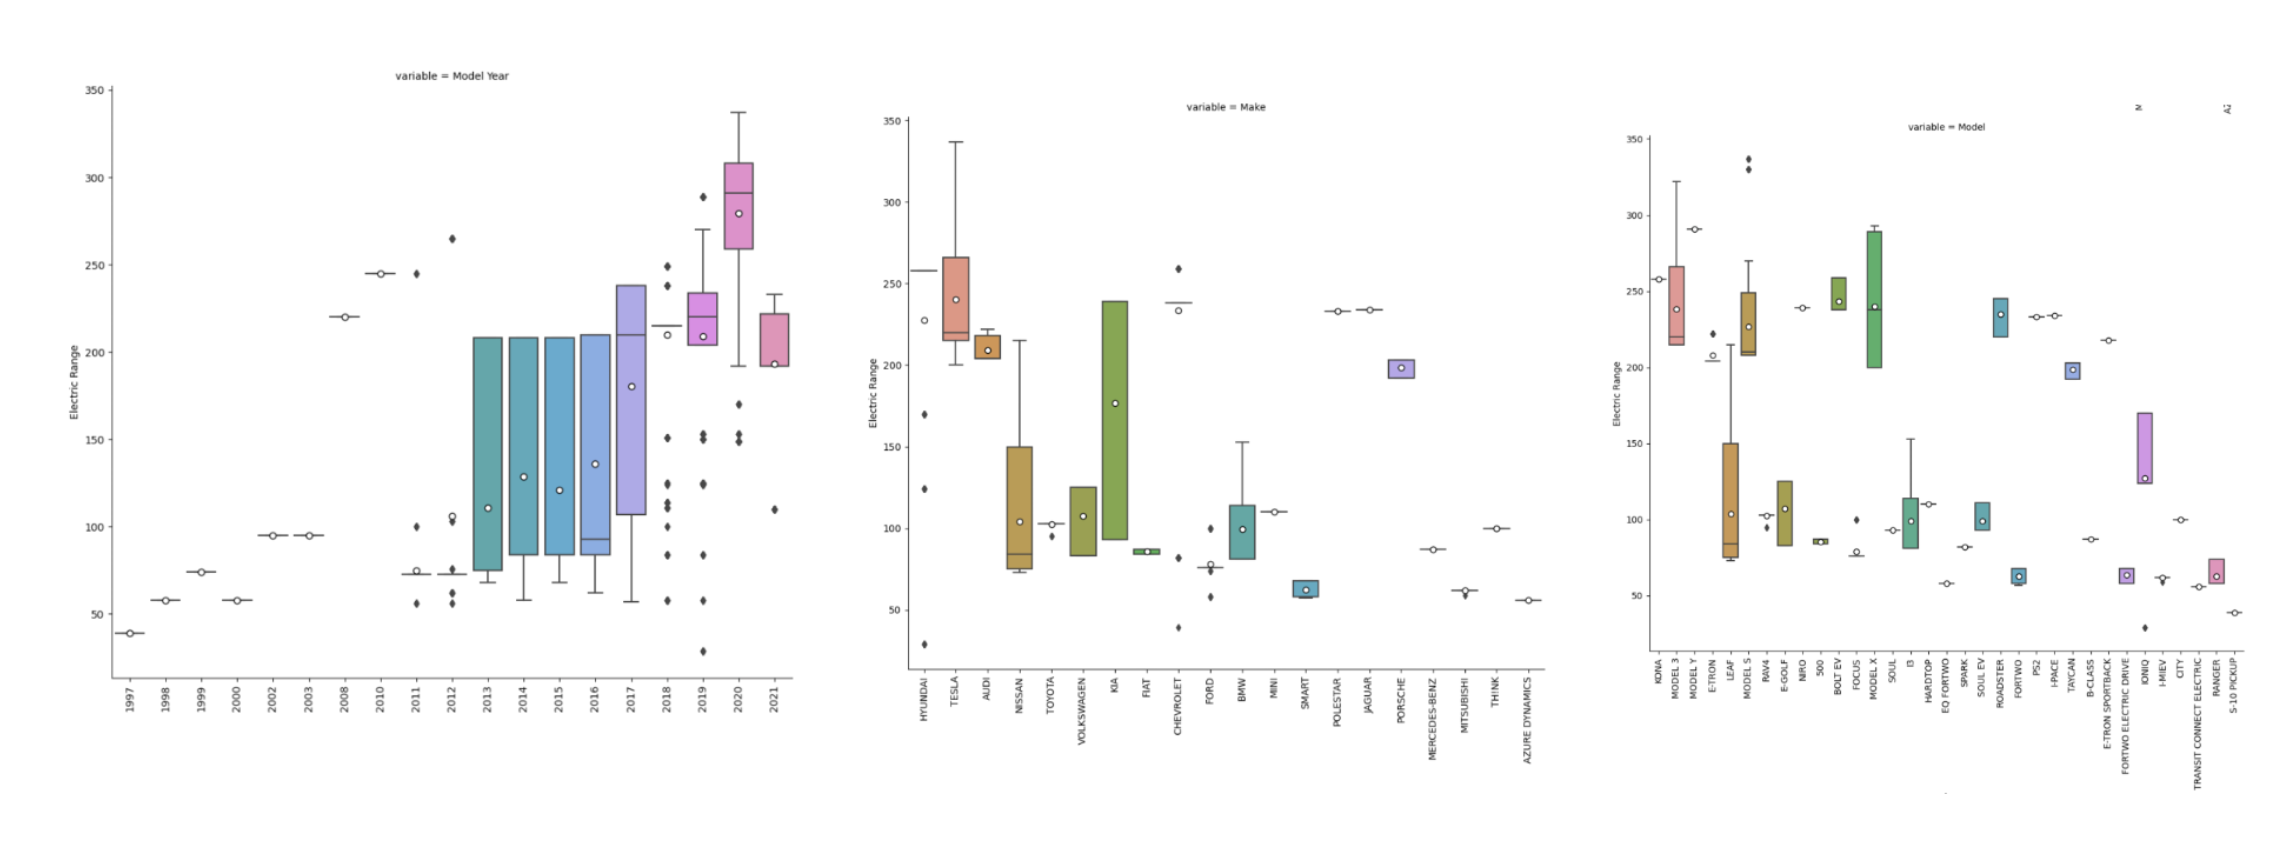


(e) "What story do these boxplots convey?" To answer this question, write at least two observations for each of the three boxplots (in total at least six observations). 

(f) Based on the box plots, does any of 'Model Year', 'Make' and 'Model' not determine the **Electric Range**, or do all of these determine it?

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data and show the first five records
df = pd.read_csv(r"C:\Users\seval\OneDrive\Desktop\DSAI510\HW3\Electric_Vehicle_Population_Data.csv")
print("First five records:")
print(df.head())

First five records:
     County  Model Year     Make           Model  \
0      King        2020  HYUNDAI            KONA   
1      King        2022     JEEP  GRAND CHEROKEE   
2    Yakima        2023     JEEP  GRAND CHEROKEE   
3      King        2018    TESLA         MODEL 3   
4  Thurston        2018      BMW              I3   

                    Electric Vehicle Type  Electric Range  
0          Battery Electric Vehicle (BEV)             258  
1  Plug-in Hybrid Electric Vehicle (PHEV)              25  
2  Plug-in Hybrid Electric Vehicle (PHEV)              25  
3          Battery Electric Vehicle (BEV)             215  
4  Plug-in Hybrid Electric Vehicle (PHEV)              97  



Number of records in df2: 47109


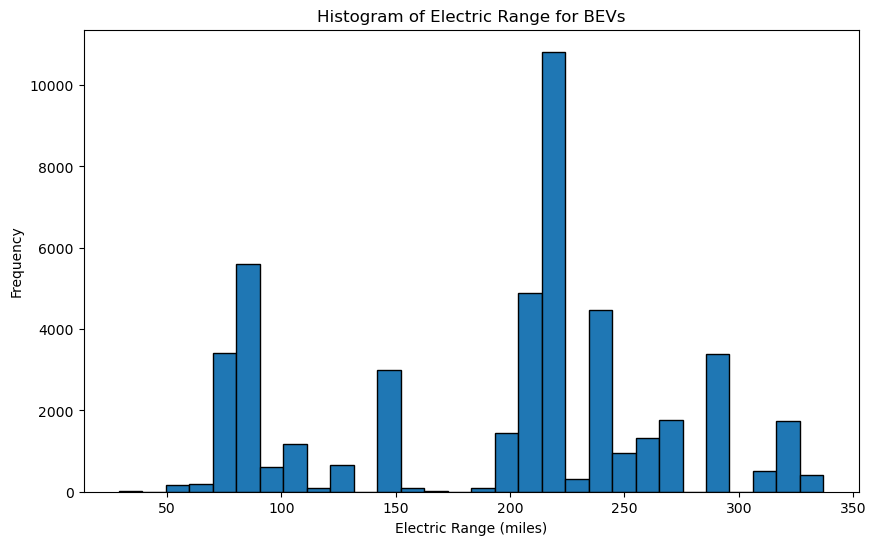

In [17]:
# Create df2 with specific conditions
df2 = df[(df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)') & (df['Electric Range'] > 0)]
print(f"\nNumber of records in df2: {len(df2)}")

# Plot histogram of Electric Range
plt.figure(figsize=(10, 6))
plt.hist(df2['Electric Range'], bins=30, edgecolor='black')
plt.title('Histogram of Electric Range for BEVs')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

<Figure size 2000x600 with 0 Axes>

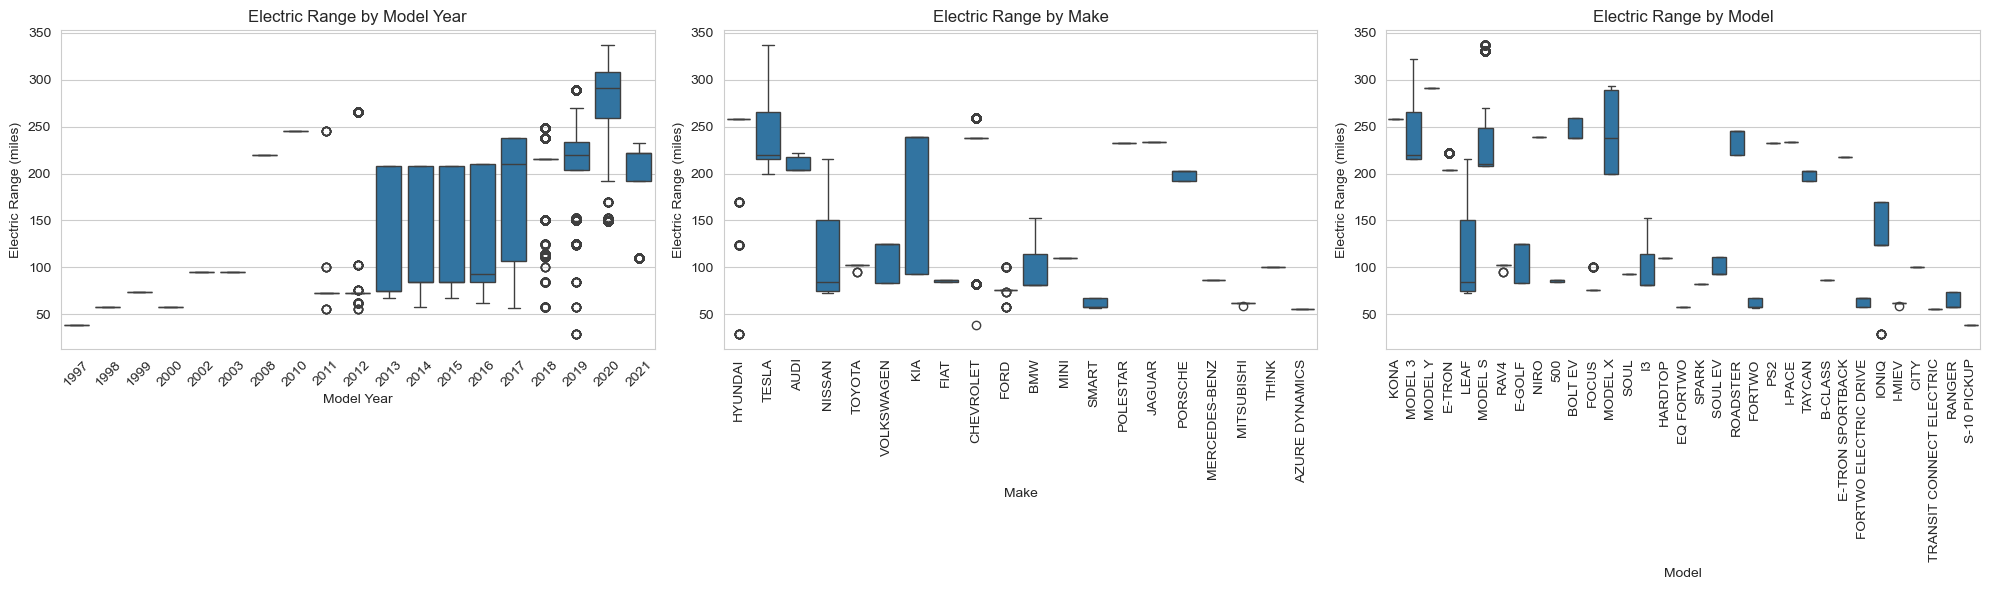

In [18]:
# (d) Create boxplots side by side
plt.figure(figsize=(20, 6))
sns.set_style("whitegrid")

# Create a 1x3 subplot
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Model Year boxplot
sns.boxplot(x='Model Year', y='Electric Range', data=df2, ax=ax1)
ax1.set_title('Electric Range by Model Year')
ax1.set_xlabel('Model Year')
ax1.set_ylabel('Electric Range (miles)')
ax1.tick_params(axis='x', rotation=45)

# Make boxplot
sns.boxplot(x='Make', y='Electric Range', data=df2, ax=ax2)
ax2.set_title('Electric Range by Make')
ax2.set_xlabel('Make')
ax2.set_ylabel('Electric Range (miles)')
ax2.tick_params(axis='x', rotation=90)

# Model boxplot
sns.boxplot(x='Model', y='Electric Range', data=df2, ax=ax3)
ax3.set_title('Electric Range by Model')
ax3.set_xlabel('Model')
ax3.set_ylabel('Electric Range (miles)')
ax3.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [22]:
# To understand better which Make has which model
# Group the data by Make and aggregate the unique Models
make_model_table = df2.groupby('Make')['Model'].unique().apply(list).reset_index()

# Sort the table by Make
make_model_table = make_model_table.sort_values('Make')

# Rename the columns for clarity
make_model_table.columns = ['Make', 'Models']

# Display the table
print(make_model_table.to_string(index=False))


          Make                                         Models
          AUDI                     [E-TRON, E-TRON SPORTBACK]
AZURE DYNAMICS                     [TRANSIT CONNECT ELECTRIC]
           BMW                                           [I3]
     CHEVROLET                  [BOLT EV, SPARK, S-10 PICKUP]
          FIAT                                          [500]
          FORD                                [FOCUS, RANGER]
       HYUNDAI                                  [KONA, IONIQ]
        JAGUAR                                       [I-PACE]
           KIA                          [NIRO, SOUL, SOUL EV]
 MERCEDES-BENZ                                      [B-CLASS]
          MINI                                      [HARDTOP]
    MITSUBISHI                                       [I-MIEV]
        NISSAN                                         [LEAF]
      POLESTAR                                          [PS2]
       PORSCHE                                       [TAYCAN]
        

In [24]:
# (e)

# 1) First chart shows that There's a clear trend of increasing electric range over time, with newer model years generally having higher 
# median ranges and larger boxes (indicating more variation).

# 2) First chart also tells us that electrical range jumped from 100-200 miles average to 200-300miles average after 2017, 
# which might be a reason of technological improvement.

# 3) Second chart shows that There's a big variation across different makes, with Tesla standing out as having the highest median range.

# 4) When compared to other makes, Kia's performance is notable. It seems to have a higher median range than many other manufacturers, 
# including some luxury brands.

# 5) In the third chart, we see that Tesla models (Model S, Model X, Model 3, Model Y) consistently show the higher ranges.

# 6) On the other hand The KONA model (Hyundai) is indeed positioned at the top of the chart, labeled as number 1 having the largest median. 
# but dataset seems to be less.

In [25]:
# (f) Based on the box plots, does any of 'Model Year', 'Make' and 'Model' not determine the Electric Range, or do all of these determine it?

# All three factors appear to be important in determining the Electric Range of vehicles.

# The Model Year seems to be the most specific determinant

# Model and make should have some sort of correlation, since producers (make) is kind of average of their produced models. 
# Despite models affects make, and make affects target value Electric range together with year, between models of a producers, 
# some has really a big variance.(E.g. hyundai has higher ER with KONA but quite low with IONIQ]) 

# So, each factor provides valuable information about the expected electric range of a vehicle


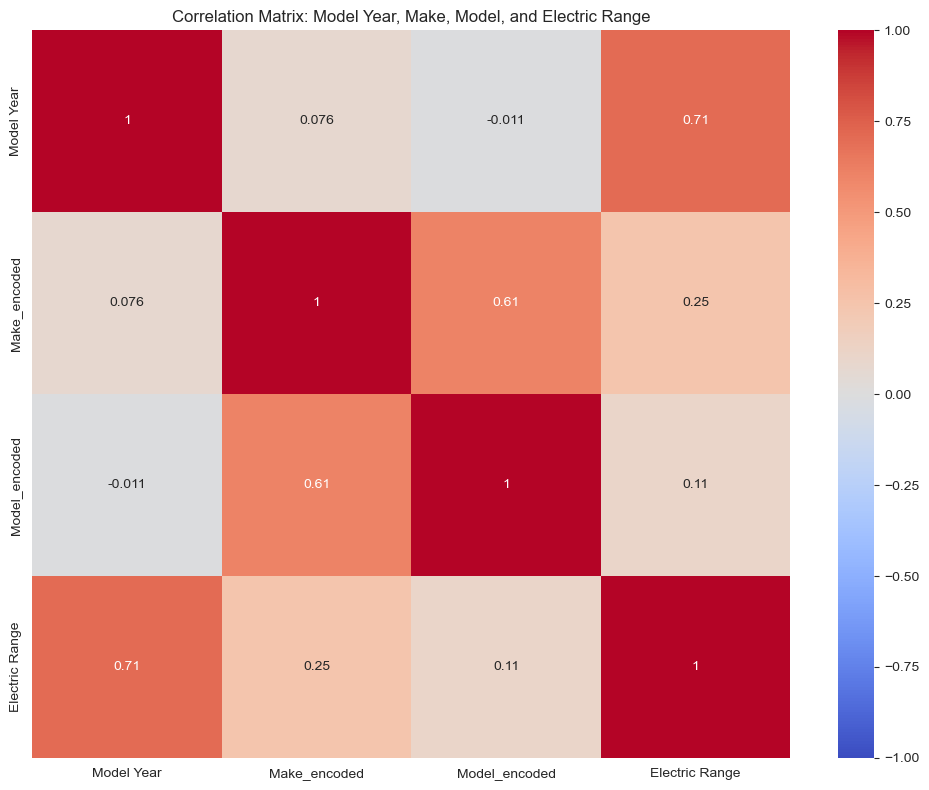

In [26]:
#to double Check question (f) here the correlation of features vs Electric range

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe with only the relevant columns
df_corr = df2[['Model Year', 'Make', 'Model', 'Electric Range']].copy()

# Encode 'Make' and 'Model' using LabelEncoder
le = LabelEncoder()
df_corr['Make_encoded'] = le.fit_transform(df_corr['Make'])
df_corr['Model_encoded'] = le.fit_transform(df_corr['Model'])

# Calculate the correlation matrix
corr_matrix = df_corr[['Model Year', 'Make_encoded', 'Model_encoded', 'Electric Range']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Model Year, Make, Model, and Electric Range')
plt.tight_layout()
plt.show()